NAMA : RAAFI DIMAS ADJI PRADANA

LINK : https://www.dicoding.com/users/raafidapski

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-22 15:52:29--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M   684KB/s    in 4m 56s  

2021-06-22 15:57:26 (1.04 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#Ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
#Mendefinisikan path
base_dir = '/tmp/rockpaperscissors'
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

#Mengecek folder rockpaperscissors
os.listdir(base_dir)

['rps-cv-images', 'scissors', 'rock', 'paper', 'README_rpc-cv-images.txt']

In [ ]:
#Membuat directory untuk data train dan data validation
train_dir = os.path.join(base_dir, "train")
os.mkdir(train_dir)

val_dir = os.path.join(base_dir, "val")
os.mkdir(val_dir)

#Membuat sub folder untuk rock papaer scissor di folder data train dan data validation
train_rock = os.path.join(train_dir, 'rock')
os.mkdir(train_rock)
train_paper = os.path.join(train_dir, 'paper')
os.mkdir(train_paper)
train_scissors = os.path.join(train_dir, 'scissors')
os.mkdir(train_scissors)

val_rock = os.path.join(val_dir, 'rock')
os.mkdir(val_rock)
val_paper = os.path.join(val_dir, 'paper')
os.mkdir(val_paper)
val_scissors = os.path.join(val_dir, 'scissors')
os.mkdir(val_scissors)

In [ ]:
#Load library split data 
from sklearn.model_selection import train_test_split

#Validation set sebesar 40% 
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size=0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size=0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size=0.4)

In [ ]:
#Menyalin semua gambar train dan validasi ke masing masing folder (data train and validation)
import shutil

# Data Training
for rock in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, rock), os.path.join(train_rock, rock))
for paper in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, paper), os.path.join(train_paper, paper))
for scissors in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, scissors), os.path.join(train_scissors, scissors))

In [ ]:
# Data Validation
for rock in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, rock), os.path.join(val_rock, rock))
for paper in val_paper_dir:
  shutil.copy(os.path.join(paper_dir, paper), os.path.join(val_paper, paper))
for scissors in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, scissors), os.path.join(val_scissors, scissors))

In [ ]:
# Jumlah data total
rock = len(os.listdir(rock_dir))
paper = len(os.listdir(paper_dir))
scissors = len(os.listdir(scissors_dir))
total_data = rock + paper + scissors
print("Total Data = ", total_data)


# Memastikan Jumlah Dataset
rock_train_count = len(os.listdir(train_rock))
paper_train_count = len(os.listdir(train_paper))
scissors_train_count = len(os.listdir(train_scissors))
train_total = rock_train_count + paper_train_count + scissors_train_count
print("Total Data Training = ", train_total)

rock_val_count = len(os.listdir(val_rock))
paper_val_count = len(os.listdir(val_paper))
scissors_val_count = len(os.listdir(val_scissors))
val_total = rock_val_count + paper_val_count + scissors_val_count
print("Total Data Validation = ", val_total)

Total Data =  2188
Total Data Training =  1312
Total Data Validation =  876


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# Compile model ddengan categorical_crossentropy
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# set log time -> untuk memastikan bahwa proses training kurang dari 30 menit 
import time
start_time = time.time()

# latih model dengan model.fit 
model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

#print waktu yang dibutuhkan untuk proses training
end_time = time.time() - start_time
print("Proses Training selesai dalam waktu: ", end_time / 60)

Epoch 1/20
25/25 - 42s - loss: 1.1952 - accuracy: 0.3663 - val_loss: 1.0426 - val_accuracy: 0.4000
Epoch 2/20
25/25 - 40s - loss: 0.8707 - accuracy: 0.5875 - val_loss: 0.5741 - val_accuracy: 0.7875
Epoch 3/20
25/25 - 40s - loss: 0.4941 - accuracy: 0.8288 - val_loss: 0.3379 - val_accuracy: 0.8813
Epoch 4/20
25/25 - 41s - loss: 0.3007 - accuracy: 0.8988 - val_loss: 0.2731 - val_accuracy: 0.8875
Epoch 5/20
25/25 - 40s - loss: 0.2569 - accuracy: 0.9062 - val_loss: 0.3593 - val_accuracy: 0.8938
Epoch 6/20
25/25 - 40s - loss: 0.1786 - accuracy: 0.9375 - val_loss: 0.1543 - val_accuracy: 0.9250
Epoch 7/20
25/25 - 40s - loss: 0.1835 - accuracy: 0.9350 - val_loss: 0.2149 - val_accuracy: 0.9187
Epoch 8/20
25/25 - 40s - loss: 0.1859 - accuracy: 0.9300 - val_loss: 0.1369 - val_accuracy: 0.9563
Epoch 9/20
25/25 - 40s - loss: 0.1568 - accuracy: 0.9563 - val_loss: 0.1933 - val_accuracy: 0.9438
Epoch 10/20
25/25 - 40s - loss: 0.2084 - accuracy: 0.9287 - val_loss: 0.1468 - val_accuracy: 0.9438
Epoch 11/

Saving 1592131361.jpg to 1592131361.jpg
1592131361.jpg
paper


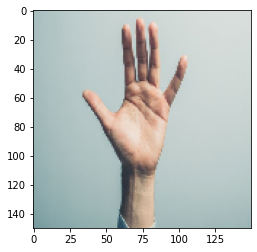

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')